# Importing all necessary modules 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
data = pd.read_csv('dataset.csv')

# Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [7]:
missing_values = data.isnull().sum()
data_cleaned = data.copy()
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object': 
        data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)
    else: 
        data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)
after_cleaned_data = data_cleaned.isnull().sum()

In [8]:
missing_values

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [9]:
after_cleaned_data

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

EXPLANATION:

-->For identifing missing data, isnull() function is used to find missing values in the dataset.

-->Adding all missing values of each column using sum() function.

-->Replacing missing values of numerical column and categorical columns with the mean and mode values of the column respectively.

-->After performing this cleaning technique checking the missing values one more time to check whether all missing values are replaced or not.

# Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [10]:
gentoo_data = data_cleaned[data_cleaned['species'] == 'Gentoo']
gentoo_avg_body_mass = gentoo_data['body_mass_g'].mean()
gentoo_avg_body_mass

5126.806262969251

EXPLANATION:

-->First line is used to isolate rows where the species is "Gentoo".

-->Second line is used to calculate the average body mass for Gentoo penguins.

# Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

In [11]:
from scipy.stats import skew, kurtosis
features = ['bill_length_mm', 'bill_depth_mm']
distribution_analysis = {}
for species in data_cleaned['species'].unique():
    species_data = data_cleaned[data_cleaned['species'] == species]
    distribution_analysis[species] = {}
    for feature in features:
        distribution_analysis[species][feature] = {
            'skewness': skew(species_data[feature]),
            'kurtosis': kurtosis(species_data[feature])
        }

distribution_analysis


{'Adelie': {'bill_length_mm': {'skewness': 0.16253332755263714,
   'kurtosis': -0.22810386996708898},
  'bill_depth_mm': {'skewness': 0.32920948782263165,
   'kurtosis': -0.1010716144438013}},
 'Gentoo': {'bill_length_mm': {'skewness': 0.7123229012050303,
   'kurtosis': 1.1476469434705532},
  'bill_depth_mm': {'skewness': 0.3346225027387713,
   'kurtosis': -0.6111262891198335}},
 'Chinstrap': {'bill_length_mm': {'skewness': -0.09593592588668304,
   'kurtosis': -0.12401146170151378},
  'bill_depth_mm': {'skewness': 0.0067259608078862046,
   'kurtosis': -0.898739653084359}}}

EXPLANATION:

-->Importing the skew and kurtosis functions from the scipy.stats module to calculate skewness and kurtosis for numerical features.

-->Defining a list of numerical features (bill_length_mm and bill_depth_mm) to analyze their distributions.

-->Creating an empty dictionary to store skewness and kurtosis values for each species and feature.

-->Iterating through each unique species in the species column of the data_cleaned DataFrame.

-->Filtering the dataset to include only rows corresponding to the current species.

-->Initializing an empty dictionary for the current species to store skewness and kurtosis results for each feature.

-->Calculating the skewness and kurtosis of the current feature's distribution for the current species using the skew and kurtosis functions respectively.

# Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

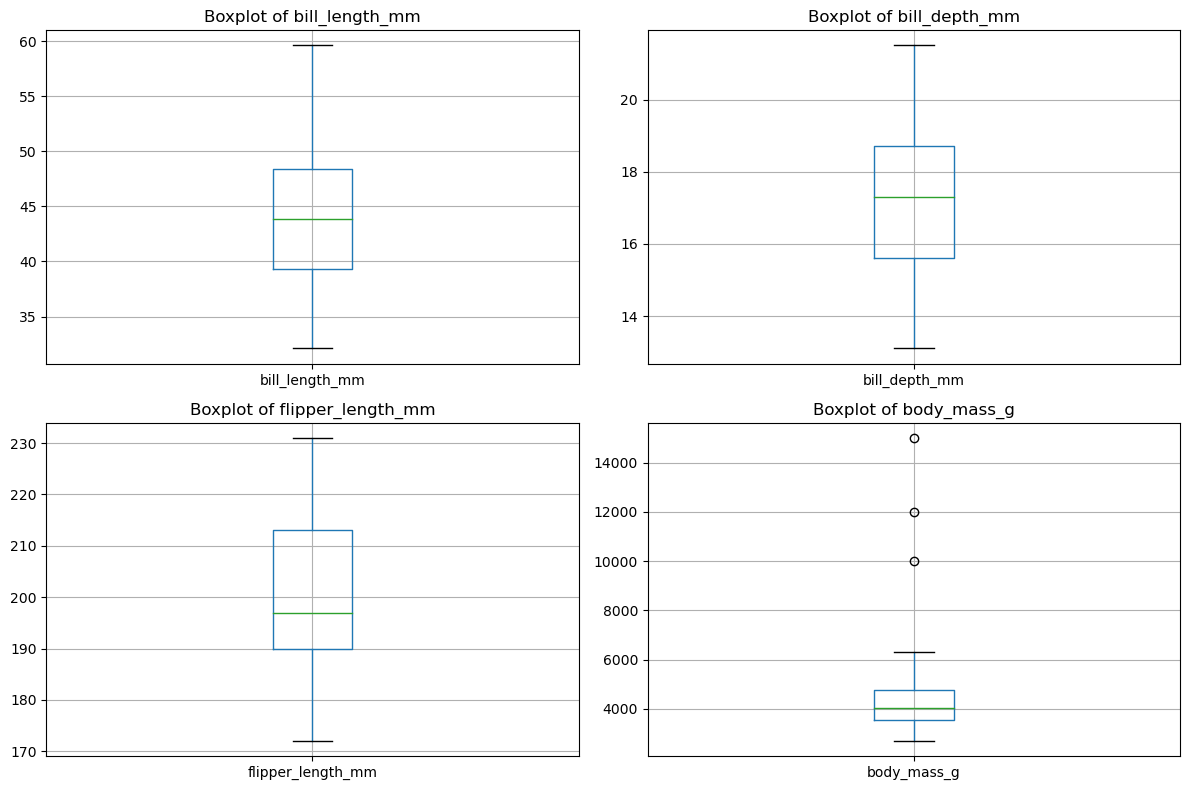

{'bill_length_mm': Empty DataFrame
 Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
 Index: [],
 'bill_depth_mm': Empty DataFrame
 Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
 Index: [],
 'flipper_length_mm': Empty DataFrame
 Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
 Index: [],
 'body_mass_g':        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 73      Adelie  Torgersen            45.8           18.9              197.0   
 206     Gentoo     Biscoe            46.5           14.4              217.0   
 324  Chinstrap      Dream            51.5           18.7              187.0   
 
      body_mass_g     sex  
 73       15000.0    male  
 206      12000.0  female  
 324      10000.0    male  }

In [13]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
outliers = {}
for column in numerical_columns:
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    data_cleaned.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

outliers


EXPLANATION:

-->Defining a list of numerical columns from the dataset to analyze for outliers.

-->Initializing an empty dictionary to store detected outliers.

-->Creating a loop to iterate over each numerical column to detect outliers using the Interquartile Range (IQR) method.

-->Calculating the 1st quartile (Q1) which is the 25th percentile and 3rd quartile (Q3) which is the 75th percentile for the current column.

-->Calculating the IQR by subtracting Q1 from Q3. The IQR is a measure of statistical dispersion.

-->Calculate the lower bound for outliers, Values below this threshold are considered outliers and also calculate the upper bound for outliers values above this thershold are considered as outliers.

-->Creating a box plot that is used to show the outliers of each numerical column visually to understand more.

# Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

-->The curse of dimensionality occurs when the number of features in a dataset is high.

-->In this dataset there are only 4 numerical features.So it doesn’t exhibit a strong curse of dimensionality.

-->However,if it is necessary Principal Component Analysis (PCA) can still reduce the dimensionality.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[numerical_columns])
pca = PCA()
pca_data = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
pca_95 = PCA(n_components=0.95)
data_pca_95 = pca_95.fit_transform(data_scaled)

explained_variance


array([0.6170052 , 0.19742404, 0.13247262, 0.05309814])

In [16]:
cumulative_variance

array([0.6170052 , 0.81442924, 0.94690186, 1.        ])

In [17]:
data_pca_95.shape

(344, 4)

EXPLANATION:

-->Importing PCA from sklearn.decomposition for performing Principal Component Analysis and StandardScaler from sklearn.preprocessing to standardize the numerical data.

-->Defining the list of numerical columns to include in the PCA analysis. 

-->Creating an object of StandardScaler, which standardizes features by removing the mean and scaling to unit variance.

--> Fitting the StandardScaler to the numerical columns and transform the data that ensures all features have a mean of 0 and a standard deviation of 1.

-->Creating an instance of the PCA class to perform dimensionality reduction.

-->Computing the proportion of the total variance explained by each principal component. The higher the explained variance, the more significant the component.

-->Calculating the cumulative explained variance by summing the explained variance ratios in order.It is used to determine the number of components needed to retain a specific percentage of variance.

-->Creating a new PCA instance to retain components that collectively explain 95% of the variance in the data.

-->Fitting the PCA model with 95% variance retained to the standardized data and transforming the data into the reduced dimensional space with fewer components while retaining 95% of the original variance.

-->explained_variance: It gives the proportion of variance explained by each principal component.
cumulative_variance: It gives the cumulative variance explained by the principal components.
data_pca_95.shape: It gives the shape of the transformed dataset.


# Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

The 7 different graphs are:

1)Scatter plot

2)Line plot

3)Violin Plot

4)Box plot

5)Pair plot

6)Heatmap

7)Bar plot

# Scatter plot 

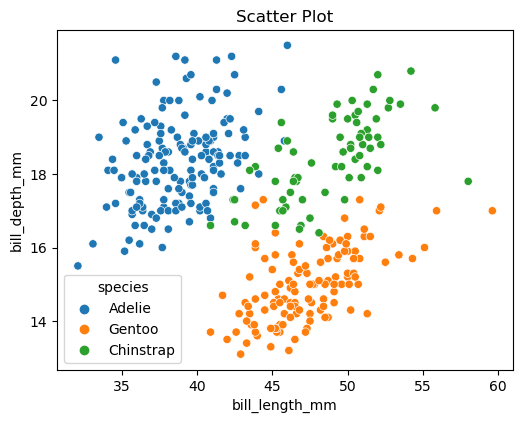

In [26]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data_cleaned)
plt.title("Scatter Plot")
plt.show()

# Line plot

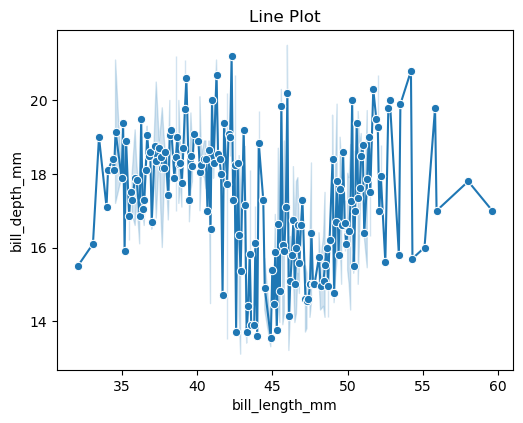

In [25]:
plt.figure(figsize=(20, 15))  
plt.subplot(3, 3, 2)
sns.lineplot(x='bill_length_mm', y='bill_depth_mm', data=data_cleaned, marker='o')
plt.title("Line Plot")
plt.show()


# Violin Plot

Text(0.5, 1.0, 'Violin Plot')

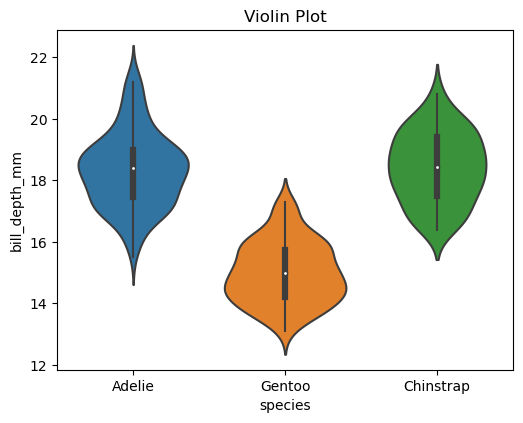

In [31]:
plt.figure(figsize=(20, 15))  
plt.subplot(3, 3, 5)
sns.violinplot(x='species', y='bill_depth_mm', data=data_cleaned)
plt.title("Violin Plot")

# Box plot

Text(0.5, 1.0, 'Box Plot')

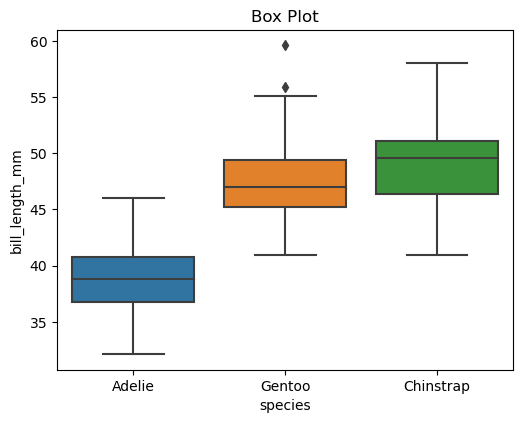

In [33]:
plt.figure(figsize=(20, 15)) 
plt.subplot(3, 3, 4)
sns.boxplot(x='species', y='bill_length_mm', data=data_cleaned)
plt.title("Box Plot")

# Pair plot

Text(0.5, 1.0, 'Pair Plot')

<Figure size 600x600 with 0 Axes>

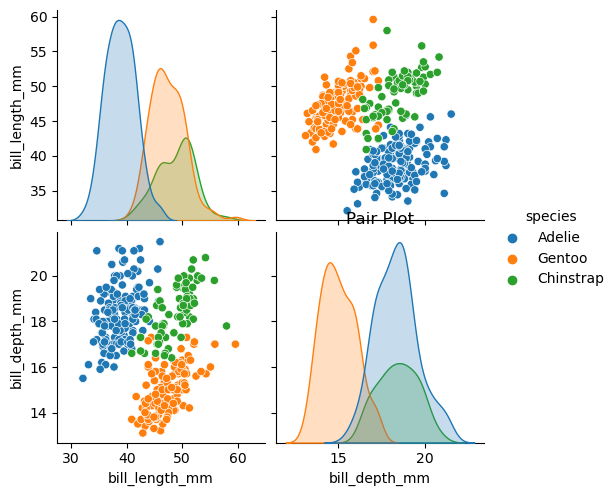

In [34]:
plt.figure(figsize=(6, 6))
sns.pairplot(data_cleaned, vars=['bill_length_mm', 'bill_depth_mm'], hue='species')
plt.title("Pair Plot")

# Heatmap

Text(0.5, 1.0, 'Heatmap')

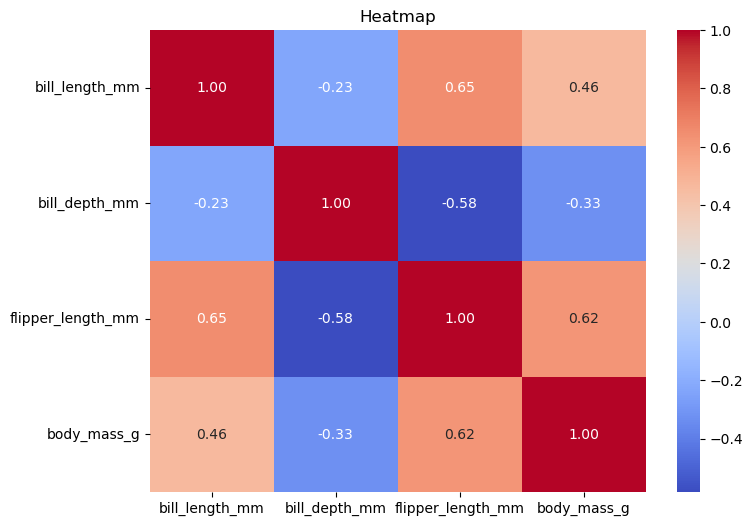

In [35]:
plt.figure(figsize=(8, 6))
correlation = data_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap")

# Bar plot

Text(0.5, 1.0, 'Average Bill Length by Species')

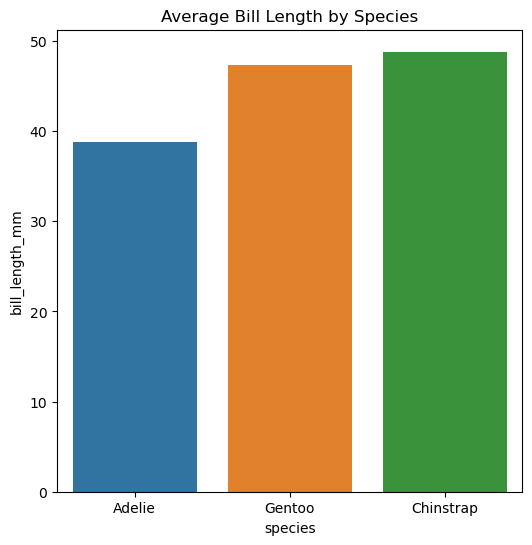

In [36]:
plt.figure(figsize=(6, 6))
sns.barplot(x='species', y='bill_length_mm', data=data_cleaned, ci=None)
plt.title("Average Bill Length by Species")

# Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [39]:
max_flipper = data_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
longest_flippers = max_flipper.loc[max_flipper.groupby('island')['flipper_length_mm'].idxmax()]

max_flipper


,species,island,flipper_length_mm
0,Adelie,Biscoe,203.0
1,Adelie,Dream,208.0
2,Adelie,Torgersen,210.0
3,Chinstrap,Dream,212.0
4,Gentoo,Biscoe,231.0


In [40]:
longest_flippers

,species,island,flipper_length_mm
4,Gentoo,Biscoe,231.0
3,Chinstrap,Dream,212.0
2,Adelie,Torgersen,210.0


# Q8: Perform z-score normalization on this dataset. (code) 

In [41]:
from scipy.stats import zscore
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
data_normalized = data_cleaned.copy()
data_normalized[numerical_columns] = data_cleaned[numerical_columns].apply(zscore)
data_normalized.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-8.822304e-01,7.877425e-01,-1.422488,-0.470213,male
1,Adelie,Torgersen,-8.083550e-01,1.265563e-01,-1.065352,-0.425343,female
2,Adelie,Torgersen,-6.606041e-01,4.317192e-01,-0.422507,-0.918910,female
3,Adelie,Torgersen,3.936873e-15,3.613854e-15,0.000000,0.000000,male
4,Adelie,Torgersen,-1.325483e+00,1.092905e+00,-0.565361,-0.739431,female


In [42]:
data_normalized.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Chinstrap,Dream,2.202069,1.347208,0.434620,-0.245865,male
340,Chinstrap,Dream,-0.069601,0.482580,0.077484,-0.784301,female
341,Chinstrap,Dream,1.056999,0.533440,-0.565361,-0.447778,male
342,Chinstrap,Dream,1.278626,0.940324,0.648902,-0.156125,male
343,Chinstrap,Dream,1.167813,0.787743,-0.208225,-0.447778,unknown


EXPLANATION:

-->Z-score normalization refers to the process of normalizing every value in a dataset such that mean of all of the values is 0 and the standard deviation is 1.

-->Z = (x – μ) / σ
 
Where:

X: Feature value.

μ: Mean of the feature.

σ: Standard deviation of the feature.